In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [12]:
files = glob.glob('../TSP/SA/*.csv')
files.sort()
#Number of Trials
trials = 5
#File name beginining
nb = 14
#File name ending
ne = -10
#Output file
name = '../TSP/tsp.csv'
#Range
r = [5,10,50,100,150,200,250,300]

In [13]:
files

['../TSP/SA/TSP_SA0.15_1_LOG.csv',
 '../TSP/SA/TSP_SA0.15_2_LOG.csv',
 '../TSP/SA/TSP_SA0.15_3_LOG.csv',
 '../TSP/SA/TSP_SA0.15_4_LOG.csv',
 '../TSP/SA/TSP_SA0.15_5_LOG.csv',
 '../TSP/SA/TSP_SA0.35_1_LOG.csv',
 '../TSP/SA/TSP_SA0.35_2_LOG.csv',
 '../TSP/SA/TSP_SA0.35_3_LOG.csv',
 '../TSP/SA/TSP_SA0.35_4_LOG.csv',
 '../TSP/SA/TSP_SA0.35_5_LOG.csv',
 '../TSP/SA/TSP_SA0.55_1_LOG.csv',
 '../TSP/SA/TSP_SA0.55_2_LOG.csv',
 '../TSP/SA/TSP_SA0.55_3_LOG.csv',
 '../TSP/SA/TSP_SA0.55_4_LOG.csv',
 '../TSP/SA/TSP_SA0.55_5_LOG.csv',
 '../TSP/SA/TSP_SA0.75_1_LOG.csv',
 '../TSP/SA/TSP_SA0.75_2_LOG.csv',
 '../TSP/SA/TSP_SA0.75_3_LOG.csv',
 '../TSP/SA/TSP_SA0.75_4_LOG.csv',
 '../TSP/SA/TSP_SA0.75_5_LOG.csv',
 '../TSP/SA/TSP_SA0.95_1_LOG.csv',
 '../TSP/SA/TSP_SA0.95_2_LOG.csv',
 '../TSP/SA/TSP_SA0.95_3_LOG.csv',
 '../TSP/SA/TSP_SA0.95_4_LOG.csv',
 '../TSP/SA/TSP_SA0.95_5_LOG.csv']

In [14]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [15]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat([dfs[x+i] for i in range(trials)])
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[r])

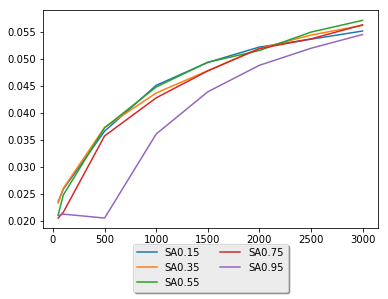

In [16]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

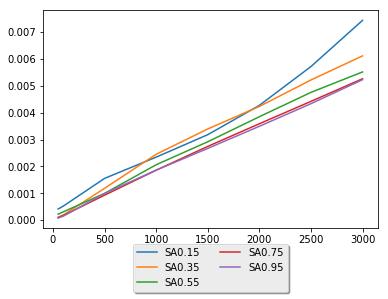

In [17]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [18]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 SA0.15
1 SA0.35
2 SA0.55
3 SA0.75
4 SA0.95


In [19]:
#Change this
df = df_concats[2]
df

,iterations,fitness,time,fevals
5,50,0.021087,0.000224,61
10,100,0.024800,0.000312,111
50,500,0.037204,0.000998,511
100,1000,0.044752,0.002064,1011
150,1500,0.049327,0.002919,1511
200,2000,0.051492,0.003850,2011
250,2500,0.054894,0.004756,2511
300,3000,0.057065,0.005517,3011


In [20]:
with open(name, 'a') as f:
    f.write('#Simulated Annealing\n')
    
df.to_csv(name, sep=',', mode='a', header=True)